<a href="https://colab.research.google.com/github/haricharanvihari/extensive_viz/blob/master/S11_DNN/S11_EVA4S11F10_Haricharan_Vihari_N_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cyclic Curve

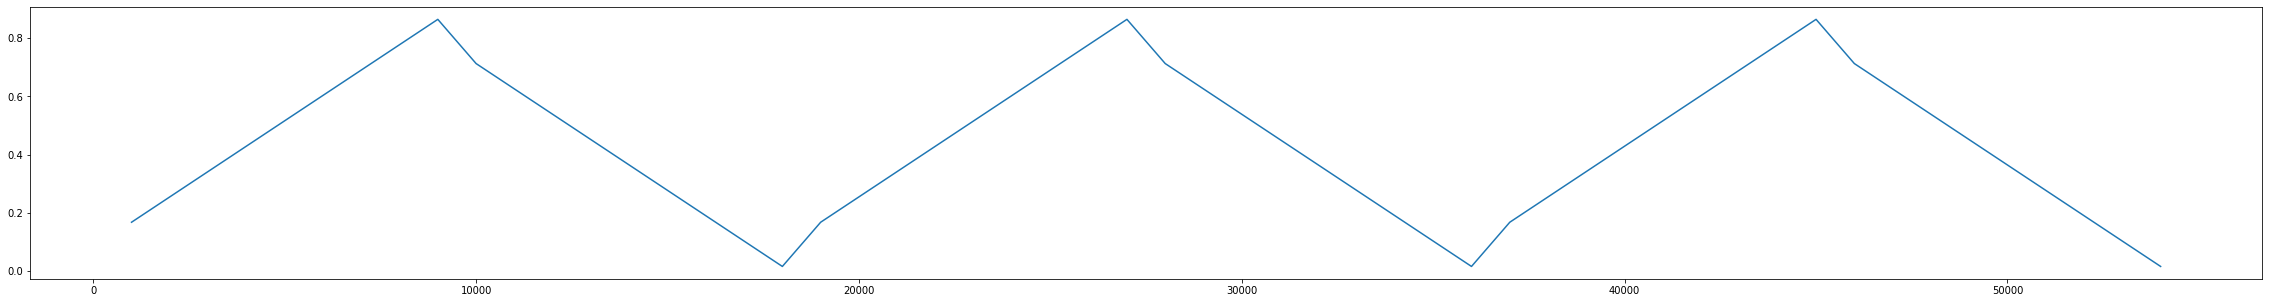

In [1]:
from cycliclr import plot_cyclic_curve

iterations = 10010
stepsize = 1000
lr_min = 0.08
lr_max = 0.8

plot_cyclic_curve(iterations, stepsize, lr_min, lr_max)

## Model

In [2]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.ResnetNew11 import ResnetNew_Cifar10DNN

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResnetNew_Cifar10DNN().to(device)
summary(model, input_size=(3, 32, 32))

     |████████████████████████████████| 122kB 10.5MB/s 
     |████████████████████████████████| 634kB 20.6MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=7ffb3cf910f3d9c191a9246665dc357adc7ac9cfb61f38a38e902005f9edbc9f
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=0f20f5c7404e2e262708f42e56b1472a4f6b28d088350ce7b69742f906ae31da
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
cuda
--------------------------------------------

## Run the Model

In [3]:
%matplotlib inline

In [4]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import OneCycleLR

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

dm = DataModel(img_data, criterion, optimizer, None, num_of_epochs = 24, cal_misclassified = True)

  pip install torch-lr-finder -v --global-option="amp"


CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Find LR Max

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


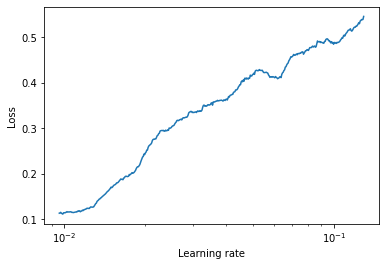

In [16]:
lr = dm.find_lr_max(model, device)

### LR Max

In [17]:
print(lr)

0.009900700201031343


## Run Model

In [18]:
# training the dataset and then running test
scheduler = OneCycleLR(optimizer, max_lr=lr, epochs=24, steps_per_epoch = len(img_data.trainloader), 
                          anneal_strategy='cos',
                          base_momentum=0.85,
                          cycle_momentum=True,
                          div_factor=10,
                          final_div_factor=10000.0,
                          last_epoch=-1,
                          max_momentum=0.95,
                          pct_start=0.3
                        )
dm.schedular = scheduler
dm.optimizer = optim_sgd.load(params=model.parameters(), lr=lr/8, momentum=0.9, weight_decay=0.005)
dm.run_model(model, device)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Loss=0.049988240003585815 Batch_id=97 Accuracy=98.11: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9242/10000 (92.42%)

EPOCH: 2


Loss=0.05890333652496338 Batch_id=97 Accuracy=98.77: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9272/10000 (92.72%)

EPOCH: 3


Loss=0.04376325011253357 Batch_id=97 Accuracy=99.04: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9291/10000 (92.91%)

EPOCH: 4


Loss=0.033588211983442307 Batch_id=97 Accuracy=99.08: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9302/10000 (93.02%)

EPOCH: 5


Loss=0.027604086324572563 Batch_id=97 Accuracy=99.24: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9287/10000 (92.87%)

EPOCH: 6


Loss=0.04361799359321594 Batch_id=97 Accuracy=99.29: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9288/10000 (92.88%)

EPOCH: 7


Loss=0.03187946230173111 Batch_id=97 Accuracy=99.35: 100%|██████████| 98/98 [00:23<00:00,  4.16it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9300/10000 (93.00%)

EPOCH: 8


Loss=0.03788990154862404 Batch_id=97 Accuracy=99.35: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9307/10000 (93.07%)

EPOCH: 9


Loss=0.03973152115941048 Batch_id=97 Accuracy=99.47: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9317/10000 (93.17%)

EPOCH: 10


Loss=0.03867477923631668 Batch_id=97 Accuracy=99.45: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9326/10000 (93.26%)

EPOCH: 11


Loss=0.03220829367637634 Batch_id=97 Accuracy=99.50: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9320/10000 (93.20%)

EPOCH: 12


Loss=0.02598811313509941 Batch_id=97 Accuracy=99.52: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9310/10000 (93.10%)

EPOCH: 13


Loss=0.028251083567738533 Batch_id=97 Accuracy=99.50: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9319/10000 (93.19%)

EPOCH: 14


Loss=0.04326709359884262 Batch_id=97 Accuracy=99.56: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9330/10000 (93.30%)

EPOCH: 15


Loss=0.027659947052598 Batch_id=97 Accuracy=99.59: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9322/10000 (93.22%)

EPOCH: 16


Loss=0.024213634431362152 Batch_id=97 Accuracy=99.62: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9323/10000 (93.23%)

EPOCH: 17


Loss=0.0264798142015934 Batch_id=97 Accuracy=99.61: 100%|██████████| 98/98 [00:23<00:00,  4.09it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9324/10000 (93.24%)

EPOCH: 18


Loss=0.027019336819648743 Batch_id=97 Accuracy=99.58: 100%|██████████| 98/98 [00:23<00:00,  4.17it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9309/10000 (93.09%)

EPOCH: 19


Loss=0.02767571434378624 Batch_id=97 Accuracy=99.66: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9310/10000 (93.10%)

EPOCH: 20


Loss=0.02437901496887207 Batch_id=97 Accuracy=99.63: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9330/10000 (93.30%)

EPOCH: 21


Loss=0.029821524396538734 Batch_id=97 Accuracy=99.66: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9303/10000 (93.03%)

EPOCH: 22


Loss=0.02107272483408451 Batch_id=97 Accuracy=99.67: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9321/10000 (93.21%)

EPOCH: 23


Loss=0.01822022534906864 Batch_id=97 Accuracy=99.67: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0004, Accuracy: 9319/10000 (93.19%)

EPOCH: 24


Loss=0.021693510934710503 Batch_id=97 Accuracy=99.69: 100%|██████████| 98/98 [00:23<00:00,  4.19it/s]



Test set: Average loss: 0.0004, Accuracy: 9324/10000 (93.24%)



## Plotting Test & Train Accuracy

[11.358, 14.47, 26.45, 38.2, 51.532, 62.98, 71.274, 75.802, 78.094, 80.04, 81.402, 81.968, 82.74, 83.326, 84.03, 84.262, 84.508, 84.902, 84.786, 84.994, 85.496, 85.898, 85.714, 85.692, 91.256, 93.224, 94.186, 94.544, 95.142, 95.494, 95.854, 95.996, 96.304, 96.178, 96.338, 96.356, 96.56, 96.604, 96.308, 96.276, 96.534, 96.538, 96.468, 96.56, 96.494, 96.556, 96.496, 96.294, 98.106, 98.772, 99.038, 99.082, 99.236, 99.294, 99.352, 99.348, 99.468, 99.448, 99.496, 99.518, 99.502, 99.562, 99.594, 99.618, 99.612, 99.578, 99.664, 99.632, 99.656, 99.672, 99.67, 99.686]
[11.75, 18.84, 31.81, 45.04, 49.24, 63.38, 60.51, 65.71, 69.99, 70.99, 67.95, 72.0, 78.34, 78.95, 71.78, 75.81, 69.52, 75.01, 78.07, 72.36, 80.18, 80.77, 81.28, 76.11, 89.66, 90.35, 90.53, 90.95, 90.7, 90.3, 90.81, 90.53, 89.95, 89.82, 89.32, 89.97, 89.66, 85.41, 90.24, 89.69, 90.54, 90.46, 89.87, 90.15, 89.84, 89.06, 87.82, 86.36, 92.42, 92.72, 92.91, 93.02, 92.87, 92.88, 93.0, 93.07, 93.17, 93.26, 93.2, 93.1, 93.19, 93.3, 93.22,

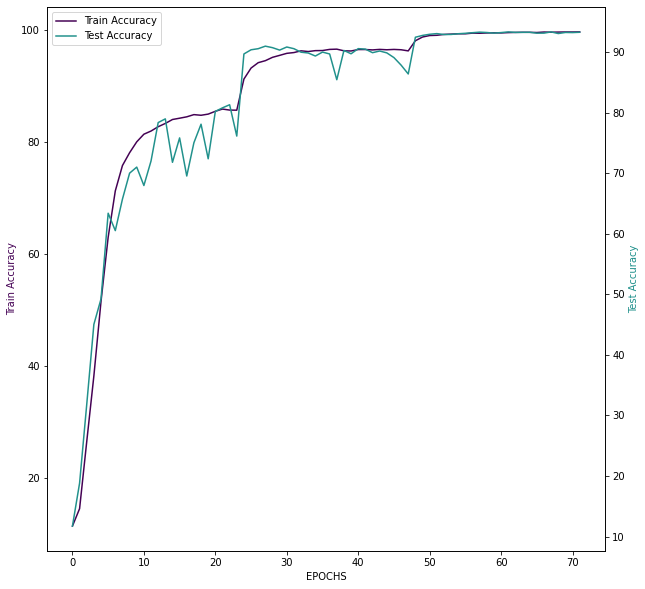

In [19]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

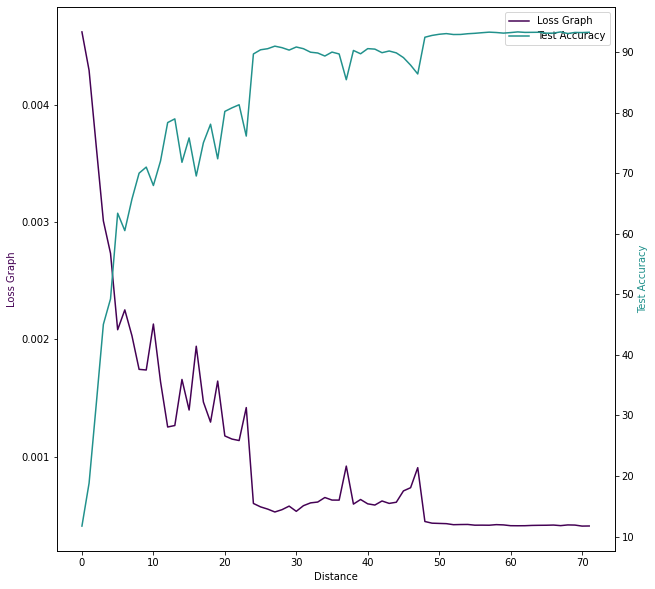

In [20]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

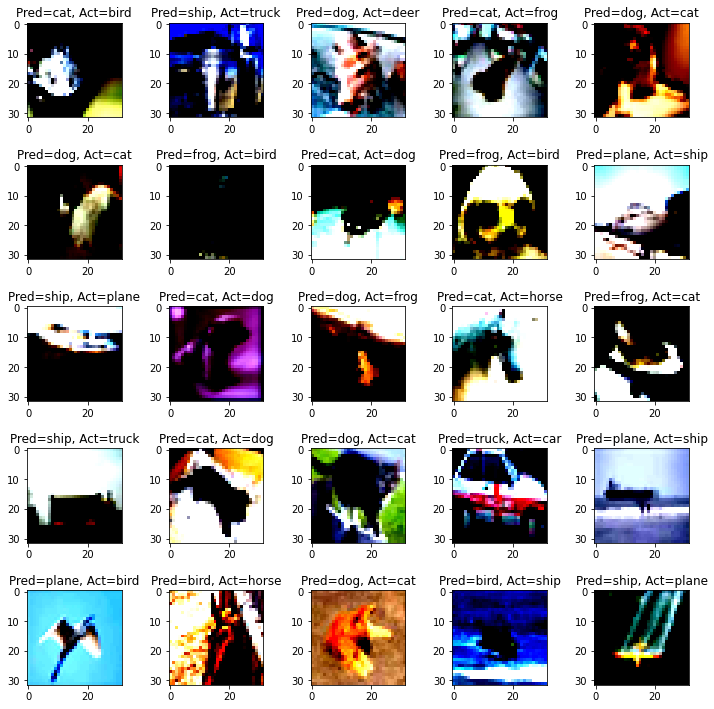

In [21]:
dm.plot_misclassified()

/content/gradcam.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplot_kw={'xticks': [], 'yticks': []})


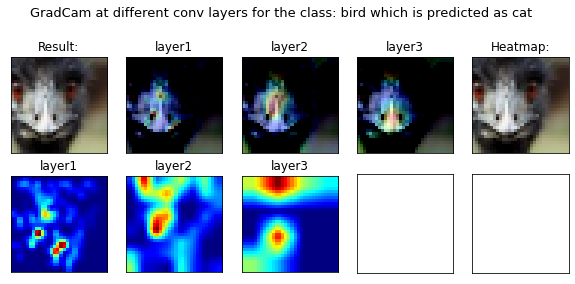

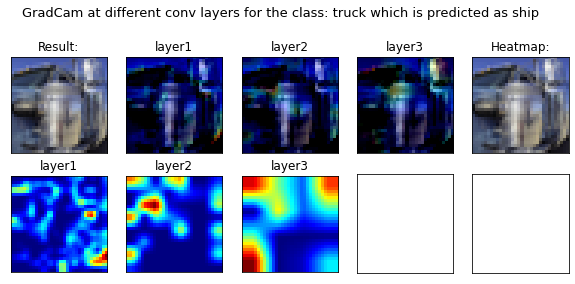

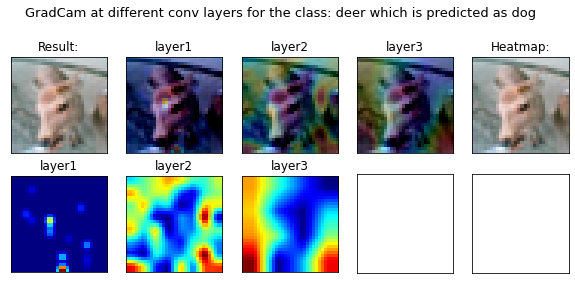

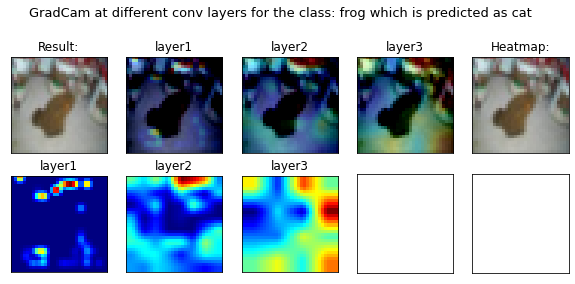

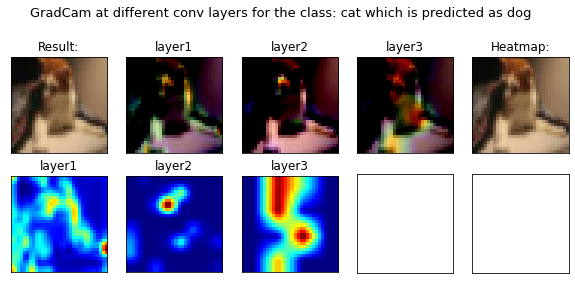

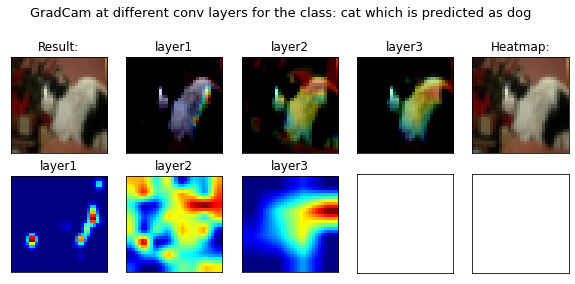

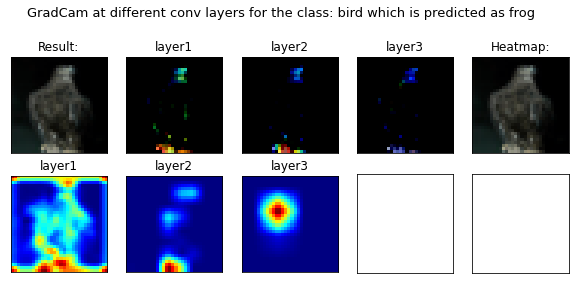

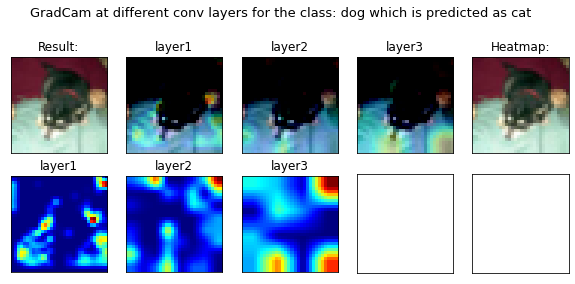

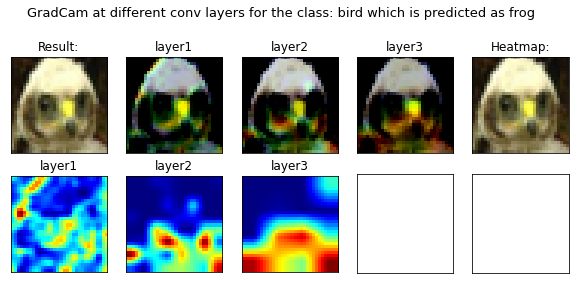

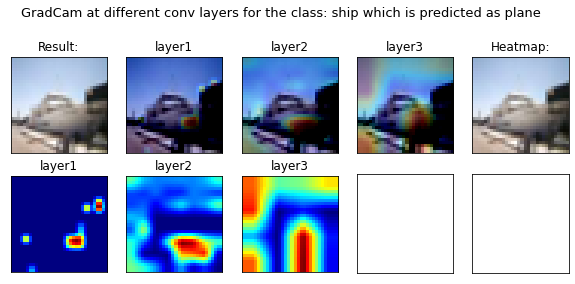

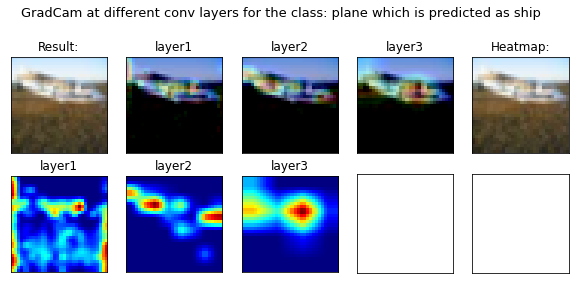

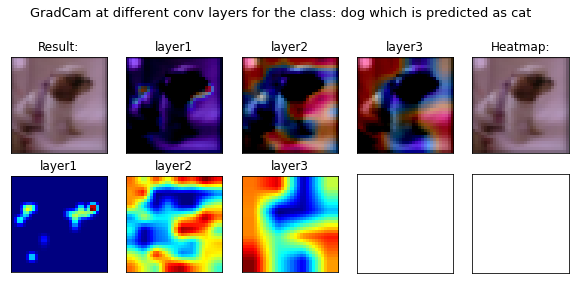

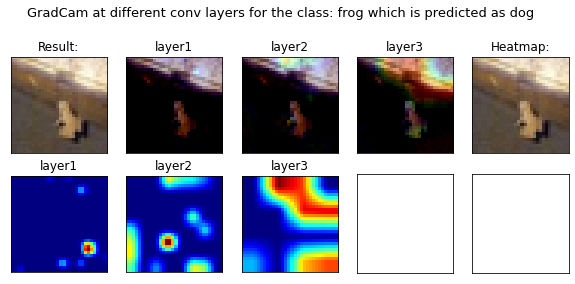

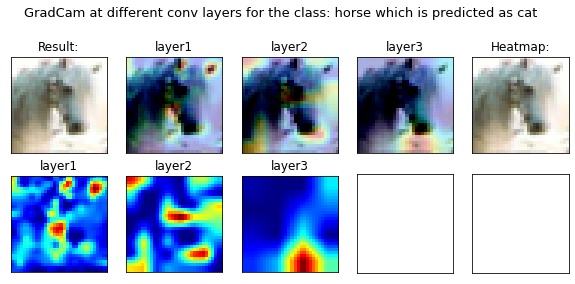

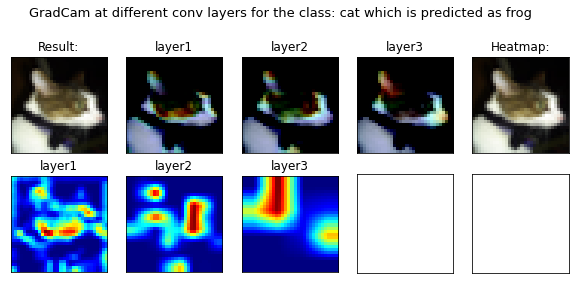

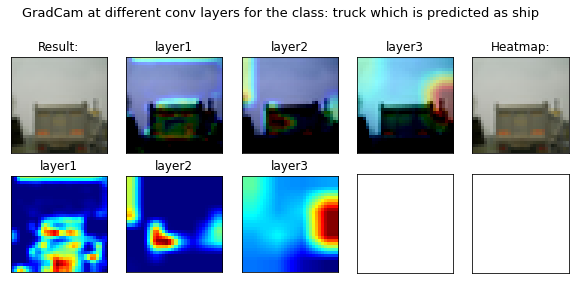

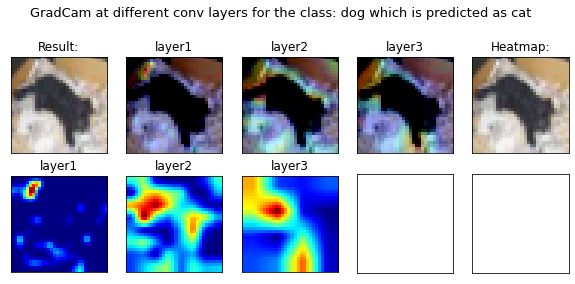

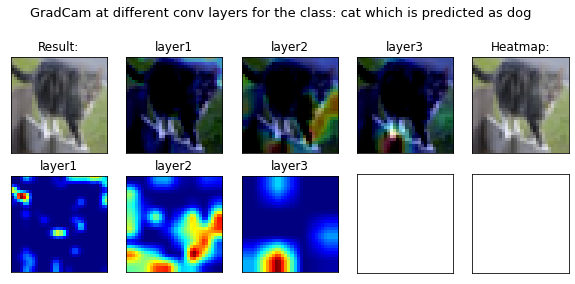

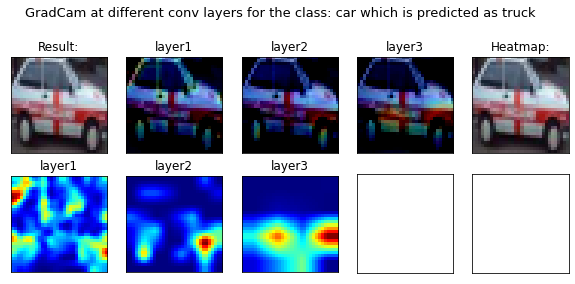

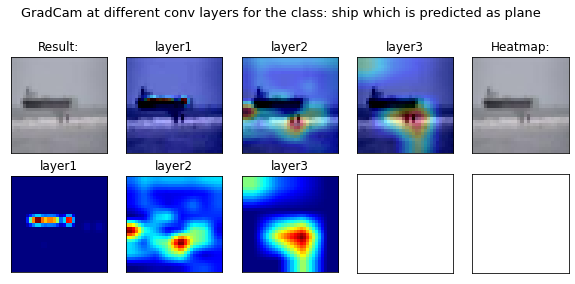

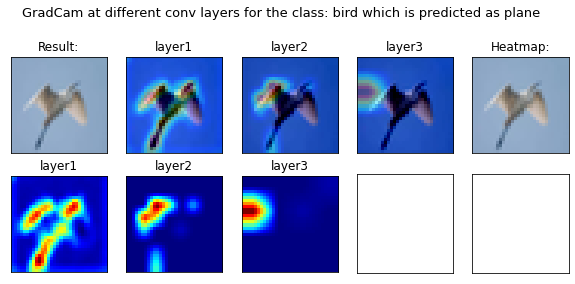

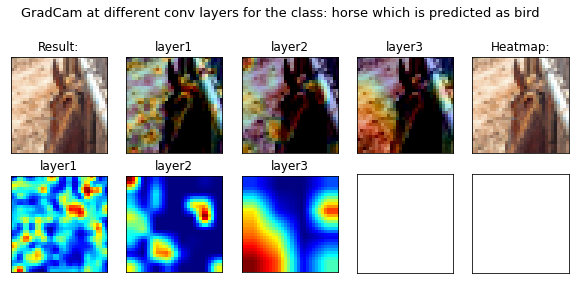

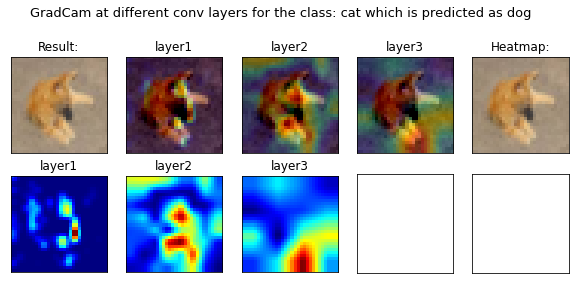

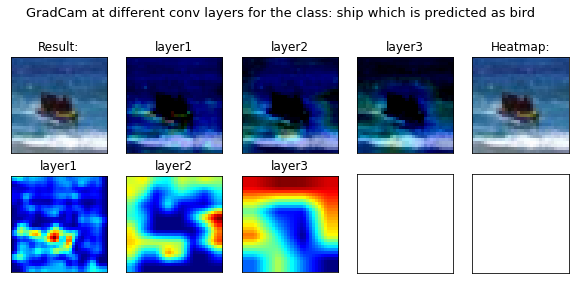

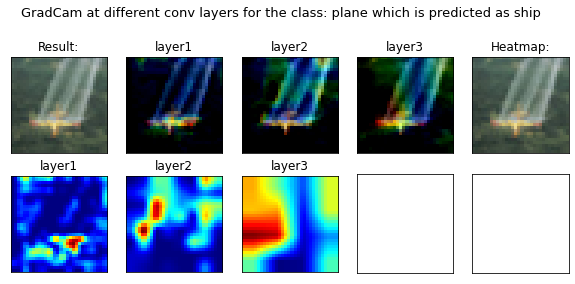

In [22]:
dm.plot_GRADcam(["layer1","layer2","layer3"])